## Niraj Chopra's Best Throw Analysis

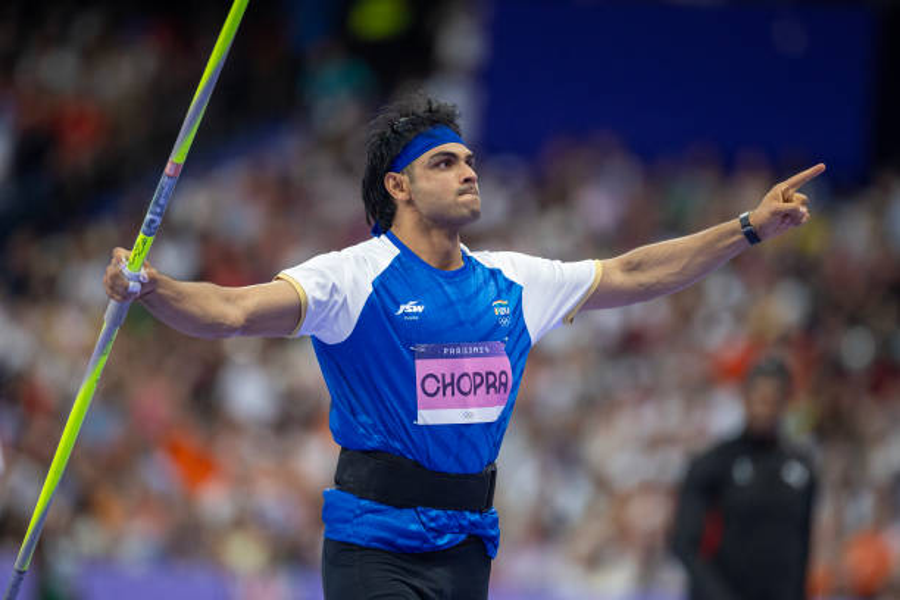

In [56]:

from PIL import Image

# Define the path to the image file
path = r"C:\Users\victus\Downloads\dwnld.jpg"

# Open the image
myImage = Image.open(path)

new_width = 900  # Set the desired width
new_height = 600  # Set the desired height
myImage_resized = myImage.resize((new_width, new_height))

# Display the resized image in the cell output
display(myImage_resized)


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline
from datetime import datetime

In [3]:
df=pd.read_excel(r"D:\Data_Analysis\Niraj_chopra.xlsx")
df.sample(5)

,Throw,Competition,Date
16,87.86m,ACNW League Meeting 1 (Potchefstroom),"January 28, 2020"
0,89.94m,Stockholm Diamond League 2022,"June 30, 2022"
5,88.88m,Asian Games 2023 (Hangzhou),"October 4, 2023"
23,87.03m,Tokyo 2020 Olympics - F,"August 7, 2021"
14,88.06m,Asian Games 2018 (Jakarta),"August 27, 2018"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Throw        34 non-null     object
 1   Competition  34 non-null     object
 2   Date         34 non-null     object
dtypes: object(3)
memory usage: 948.0+ bytes


In [5]:
df.shape

(34, 3)

In [6]:
df['Date']=pd.to_datetime(df['Date'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Throw        34 non-null     object        
 1   Competition  34 non-null     object        
 2   Date         34 non-null     datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 948.0+ bytes


# TOP5 Throws of Golden Boy

In [8]:
df['Throw']=df['Throw'].str.replace('m','').astype('float')
TOP5_throw=df.sort_values('Throw',ascending=False).nlargest(5,'Throw')
print(TOP5_throw)

   Throw                    Competition       Date
0  89.94  Stockholm Diamond League 2022 2022-06-30
1  89.45        Paris 2024 Olympics - F 2024-08-08
2  89.34        Paris 2024 Olympics - Q 2024-08-06
3  89.30      Paavo Nurmi Games (Turku) 2022-06-14
4  89.08   Lausanne Diamond League 2022 2022-08-26


In [9]:
fig=px.bar(TOP5_throw,x='Competition',y='Throw',color='Throw',text_auto=True,title='Neeraj Chopra Top 5 Throws Per Tournament')

fig.update_layout(
    autosize=False,
    width=1200,
    height=500,
)
fig.show()

In [10]:
mean_throw=df['Throw'].mean()
median_throw=df['Throw'].median()
fig=px.histogram(df,x='Throw',nbins=10,title="Frequency Distribution of Javelin Throws with Mean and Median",
                 labels={'value':'Javelin throw distance(m)','count':'Frequency'},color_discrete_sequence=['skyblue'])

fig=go.Figure(fig)

fig.add_vline(x=mean_throw,line=dict(color='green',width=2,dash='dash'))
fig.add_vline(x=median_throw,line=dict(color='red',width=2,dash='dash'))

fig.add_annotation(x=mean_throw, y=0, yref="paper", text=f'Mean: {mean_throw:.2f}', showarrow=True, arrowhead=1, ax=40, ay=-40, bgcolor="white")
fig.add_annotation(x=median_throw, y=0, yref="paper", text=f'Median: {median_throw:.2f}', showarrow=True, arrowhead=1, ax=-40, ay=-40, bgcolor="white")


fig.show()

### No of Throws thrown by Niraj of chopra in each competition

In [11]:
df1=df.groupby(by='Competition').agg({'Throw':['count','min','max','mean','median']}).reset_index()
df1.columns = ['Competition', 'Count', 'Min', 'Max', 'Mean', 'Median']

# Sort the DataFrame based on the 'Max' column in descending order
df1_sorted = df1.sort_values(by='Max', ascending=False)
df1_sorted

,Competition,Count,Min,Max,Mean,Median
16,Stockholm Diamond League 2022,4,86.67,89.94,87.727500,87.150
14,Paris 2024 Olympics - F,1,89.45,89.45,89.450000,89.450
15,Paris 2024 Olympics - Q,1,89.34,89.34,89.340000,89.340
13,Paavo Nurmi Games (Turku),2,86.92,89.30,88.110000,88.110
11,Lausanne Diamond League 2022,1,89.08,89.08,89.080000,89.080
2,Asian Games 2023 (Hangzhou),1,88.88,88.88,88.880000,88.880
22,World Athletics Championships 2023 (Budapest) - Q,1,88.77,88.77,88.770000,88.770
5,Doha Diamond League 2023,2,86.52,88.67,87.595000,87.595
24,Zurich Diamond League Final 2022,3,87.00,88.44,87.813333,88.000
20,World Athletics Championships 2022 (Oregon) - Q,1,88.39,88.39,88.390000,88.390


In [12]:
fig= px.bar(df1_sorted,x='Count',y='Competition',color='Competition',orientation='h',hover_data=['Count'],
            title='Count of throws by each competition',text_auto=True)



fig.update_layout(xaxis_title='Count of Throws',
                  yaxis_title='Competition',
                  yaxis=dict(showgrid=False),
                  width=1500,
                  height=600)


fig.show()

In [13]:
df['Year']=df['Date'].dt.year

### No of game played per year by Niraj Chopra

In [14]:
No_of_game_per_year=df.groupby(by='Year').agg({'Competition':['count']}).reset_index()
No_of_game_per_year.columns=['year','count']
No_of_game_per_year

,year,count
0,2016,1
1,2018,3
2,2020,1
3,2021,6
4,2022,13
5,2023,7
6,2024,3


In [15]:
fig=px.bar(No_of_game_per_year,x='year',y='count',text_auto=True,color='year',title='No of competition played each year',
           labels={'year':'Year','count':'No of competition'})
fig.show()

In [16]:
df2=pd.read_excel(r"C:\Users\victus\Downloads\arshadvsniraj.xlsx")
df2.head()

,EVENT,Neeraj Chopra,Arshad Nadeem
0,"South Asian Games 2016, Guwahati",1st (82.23m),3rd (78.33m)
1,"Asian Junior Championships 2016, Ho Chi-Minh",2nd (77.60m),3rd (73.40m)
2,"World U20 Athletics Championships 2016, Bydgos...",1st (86.48m),30th (67.17m)
3,"Asian Athletics Championships 2017, Bhubaneshwar",1st (85.23m),7th (78.00m)
4,"Commonwealth Games 2018, Gold Coast",1st (86.47m),8th (76.02m)


In [17]:
import re

#Function to replace 1st,(),m
def extract_distance(text):
    return re.sub(r'.*\((\d+\.\d+)m\)', r'\1', text)

# Apply the function to the 'Throw Distance' column
df2['Neeraj Chopra'] = df2['Neeraj Chopra'].apply(extract_distance)
df2['Arshad Nadeem'] = df2['Arshad Nadeem'].apply(extract_distance)

In [18]:
df2.head()

,EVENT,Neeraj Chopra,Arshad Nadeem
0,"South Asian Games 2016, Guwahati",82.23,78.33
1,"Asian Junior Championships 2016, Ho Chi-Minh",77.60,73.40
2,"World U20 Athletics Championships 2016, Bydgos...",86.48,67.17
3,"Asian Athletics Championships 2017, Bhubaneshwar",85.23,78.00
4,"Commonwealth Games 2018, Gold Coast",86.47,76.02


In [20]:
df2[['Neeraj Chopra','Arshad Nadeem']]=df2[['Neeraj Chopra','Arshad Nadeem']].astype('float') #datatype change

In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   EVENT          10 non-null     object 
 1   Neeraj Chopra  10 non-null     float64
 2   Arshad Nadeem  10 non-null     float64
dtypes: float64(2), object(1)
memory usage: 372.0+ bytes


In [22]:
df2.rename(columns={'EVENT':'Competition'},inplace=True)

### Neeraj Vs Nadeem

In [23]:
fig=go.Figure()

fig.add_trace(go.Scatter(
    x=df2['Competition'],
    y=df2['Neeraj Chopra'],
    mode='markers+lines',
    name='Neeraj',
    marker=dict(color='orange', size=10),
    line=dict(color='orange', width=2),
    text=df2['Neeraj Chopra'],  
    textposition='top center'
))
fig.add_trace(go.Scatter(
    x=df2['Competition'],
    y=df2['Arshad Nadeem'],
    mode='markers+lines',
    name='Nadeem',
    marker=dict(color='green', size=10),
    line=dict(color='green', width=2),
     text=df2['Arshad Nadeem'],  
    textposition='top center'
))

fig.update_layout(
    title='Neeraj Vs Nadeem',
    xaxis_title='Competition',
    yaxis_title='Throw Distance (m)',
    legend_title='Players',
    template='plotly_white',
    height=500,
    width=1000
)

# Show the plot
fig.show()



In [24]:
df3=pd.read_excel(r"C:\Users\victus\Downloads\medal_list.xlsx")
df3.head()

,Year,Event,Medal/Position
0,2016,South Asian Games,Gold
1,2016,Asian U20 Championships,Silver
2,2016,World U20 Championships,Gold
3,2017,Asian Championships,Gold
4,2018,Commonwealth Games,Gold


In [27]:
df3.rename(columns={'Medal/Position': 'Medal'}, inplace=True) #Rename of column

## Medal count per Event

In [34]:
combined_label=[f"{Event} {Year}" for Event,Year in zip(df3['Event'],df3['Year'])] #Event and year as one column
gold=[1 if medal =='Gold' else 0 for medal in df3['Medal']]
silver=[1 if medal=='Silver' else 0 for medal in df3['Medal']]

In [35]:
import plotly.graph_objects as go
fig=go.Figure()

fig.add_trace(go.Bar(
    x=combined_label,
    y=gold,
    name='Gold Medals',
    marker_color='gold'
))

fig.add_trace(go.Bar(
    x=combined_label,
    y=silver,
    name='Silver Medals',
    marker_color='black'
))
fig.update_layout(
    title='Medal Distribution Across Events',
    xaxis_title='Event',
    yaxis_title='Count',
    barmode='group'
)
fig.show()